# Arbre couvrant de poids minimum

## Introduction

L'objectif de ce projet était d'implémenter des algorithmes de graphe sous Python permettant de résoudre le problème de l'arbre couvrant de poids minimum. Pour fixer les idées, on considère un graphe non-orienté connexe $G=[S,A]$ dont chaque arête possède un poids $p_{a}$. Le problème de l'arbre couvrant de poids minimum consiste à chercher un sous-ensemble d'arêtes $A'\subset A$ tel que le sous-graphe de $G$ restreint à $A'$ est un arbre et dont la somme des poids des arêtes est minimum. Nous avons étudié en cours 2 algorithmes permettant de résoudre ce problème : les algorithmes de Kruskal et de Prim. Dans un premier temps, nous avons codé puis testé une première version (non optimisée) de ces 2 algorithmes. Dans un second temps, nous avons modélisé ce problème comme un programme linéaire en nombre entier en utilisant la librairie PuLP.

## Algorithmes de Kruskal et de Prim

Tout d'abord, nous venons importer les modules dont nous avons besoin pour ce projet.

In [27]:
import random
import time
from heapq import *

Nous avons ensuite commencé la résolution du problème par la contruction d'une Classe Graphe, que les différents algorithmes viendront utiliser. Nous avons décidé pour chaque graphe d'avoir des variables donnant le nombre de sommets et d'arêtes. De plus, nous avons mis tous les sommets dans une liste. Enfin pour les arêtes, nous avons fonctionné avec un double dictionnaire dont le premier index représente le sommet de départ et le 2ème index le sommet d'arrivée. 
Voici la déclaration de la classe :

In [8]:
#Classe représentant un graphe
class Graphe():
    
    def __init__(self):
        self.nbS = 0 #nombre de Sommets du Graphe
        self.nbA = 0 #nombre d'Arêtes du Graphe
        self.so= [] #liste des différents sommets
        self.ar= {} #dictionnaire contenant les arêtes
  
    #Méthode pour rajouter un sommet au graphe 
        #nom : nom du sommet
        #impress = 1 si on affiche un message si le sommet existe
        #deja , 0 sinon
    def ajouterSommet(self,nom,impress=1):
        if(nom not in self.so):   #On teste si le nom du sommet n'existe pas déjà
            self.nbS=self.nbS+1;
            self.so.append(nom)
            self.ar[nom]={}
        else:
            if(impress==1):
                print("Warning : Il existe déjà un sommet avec ce nom !")
    
    #Méthode pour rajouter une arête au graphe
        #depart : 1 extremité de l'arête
        #arrivee : l'autre extrémité de l'arête
        #val : valeur de l'arête
    def ajouterArete(self,depart,arrivee,val):
        #on ajoute les 2 sommets s'ils n'existent pas
        self.ajouterSommet(depart,0)  
        self.ajouterSommet(arrivee,0) 
        #si l'arete n'existe pas déjà, on augmente le nombre d'arete dans le graphe
        if(arrivee not in self.ar[depart]):
            self.nbA+=1
        #on garde en mémoire enfin la valeur de l'arete
        self.ar[depart][arrivee]=val
        self.ar[arrivee][depart]=val
        
        
    #Création de la liste des arêtes triées par ordre croissant    
    def minArete(self):
        minimum=[]
        #Remplissage de la liste avec toutes les arêtes
        for key1 in self.ar.keys():
            for key2 in self.ar[key1].keys():
                val=self.ar[key1][key2]
                #On vient ne garder qu'une copie de chaque arête (suppression des doublons)
                if(int(key1)<int(key2)):    
                    minimum.append([key1,key2,val])
        #On trie la liste par ordre croissant des valeurs des arêtes
        minimum = sorted(minimum, key= lambda x : x[2])
        return(minimum)
        
    #Supression d'une arête
        #depart : 1 extremité de l'arête
        #arrivee : l'autre extrémité de l'arête
        #val : valeur de l'arête
    def enleverArete(self,depart,arrivee):
        #Test pour savoir si l'arête existe
        if(not(depart in self.ar.keys() and arrivee in self.ar[depart].keys())):
            print("Cette arête n'existe pas !")
            return(False)
        #On retire l'arête
        self.nbA-=1
        #on vient les supprimer respectivement dans leur liste des voisins
        del(self.ar[depart][arrivee]) 
        del(self.ar[arrivee][depart])
        return(True)

Ensuite, pour résoudre le problème de l'arbre couvrant de poid minimum à partir d'un graphe non orienté connexe, nous avons codé les algorithmes de Prim et de Kruskal.
Nous avons commencé par l'implémentation de l'algorithme de Prim que l'on peut voir ci-dessous :

In [3]:
#Deuxième version de l'Algorithme de Prim
    #G : un graphe simple non orienté connexe
def Prim2(G):
    #Création de l'Arbre Couvrant de poids minimal
    Gfinal=Graphe()
    #Choix d'un sommet aléatoire que l'on rajoute à l'arbre
    choice=random.choice(G.so)
    Gfinal.ajouterSommet(choice)
    #Création d'un tas min binaire
    heap=[]
    #Ajout de toutes les arêtes ayant le premier sommet comme extrémité
    #au tas min binaire
    for key2 in G.ar[choice].keys():
        heappush(heap , (G.ar[choice][key2],choice,key2))
    #Tant que l'arbre couvrant de poids minimum n'est pas composé de tous les sommets,
    #on prend le minimum des arêtes dans le tas min
    while Gfinal.nbS < G.nbS:
        #Récupération du minimum
        minimum=heappop(heap)
        #On regarde si les extrémités sont déjà dans l'arbre couvrant
        extremite1= minimum[1] in Gfinal.so
        extremite2= minimum[2] in Gfinal.so
        #Si il y en a une présente dans le graphe et l'autre non alors on l'ajoute à l'arbre
        if extremite1+extremite2<2:
            #On ajoute toutes les arêtes ayant pour extrémité le sommet qui n'est pas déjà dans l'arbre
            if extremite1:
                for key2 in G.ar[minimum[2]].keys():
                    heappush(heap , (G.ar[minimum[2]][key2] ,minimum[2],key2))
            else :
                for key2 in G.ar[minimum[1]].keys():
                    heappush(heap ,(G.ar[minimum[1]][key2],minimum[1],key2))
            #On ajoute l'arête à l'arbre
            Gfinal.ajouterArete(minimum[1],minimum[2],minimum[0])
    #On retourne l'arbre couvrant de poids minimum
    return(Gfinal)

In [4]:
#Deuxième version de l'Algorithme de Prim
    #G : un graphe simple non orienté connexe
def Prim(G):
    #Création de l'Arbre Couvrant de poids minimal
    Gfinal=Graphe()
    #Choix d'un sommet aléatoire que l'on rajoute à l'arbre
    choice=random.choice(G.so)
    Gfinal.ajouterSommet(choice)
    #Création de la liste des arêtes triées dans l'ordre croissant
    arTrie=G.minArete()
    for i in range(1,G.nbS):
        find=False   #Variable indiquant si l'arête respectant les conditions a été trouvée
        j=0
        while j < len(arTrie) and find == False :
            if( (( arTrie[j][0] in Gfinal.so) and  not ( arTrie[j][1] in Gfinal.so )) or (( arTrie[j][1] in Gfinal.so) and  not ( arTrie[j][0] in Gfinal.so )) ):
                #On ajoute l'arête à l'arbre
                Gfinal.ajouterArete(arTrie[j][0],arTrie[j][1],arTrie[j][2]) 
                #On supprime l'arête de la liste
                del(arTrie[j])  
                find=True
            #On augmente le nombre d'arête trouvée
            j+=1
    #On retourne l'arbre couvrant de poids min
    return(Gfinal)

Afin de tester notre fonction pour l'algorithme de Prim, nous allons l'utiliser sur l'exemple du cours que l'on peut voir ci-dessous (les poids des arêtes sont en rouge) :

![title](image1.png)

In [7]:
G1=Graphe()
G1.ajouterArete("0","1",5)
G1.ajouterArete("0","4",4)
G1.ajouterArete("4","1",6)
G1.ajouterArete("4","3",2)
G1.ajouterArete("1","3",4)
G1.ajouterArete("1","2",2)
G1.ajouterArete("3","2",3)
arbre=Prim(G1)
ls=arbre.minArete()
print(ls)

[['3', '4', 2], ['1', '2', 2], ['2', '3', 3], ['0', '4', 4]]


On remarque que l'on obtient bien l'arbre couvrant de poids minimum que nous avions trouvé en appliquant manuellement l'algorithme. L'algorithme implémenté semble bien fonctionner. Nous le retesterons une 2ème fois plus tard en comparant les résultats avec celui de Kruskal.

![title](image2.png)

Le 2ème algorithme qui permettait de résoudre le problème de l'arbre couvrant de poids minimum était l'algorithme de Kruskal.
Avant d'implémenter cet algorithme, nous devons créer un algorithme qui détecte s'il y a un cycle ou non dans le graphe non orienté considéré :

In [8]:
#Algorithme qui détecte la présence d'un cycle dans un graphe non-orienté quelconque
    #G : Graphe non orienté
def detectionCycle(G):
    #Couleur des sommets (w : pas visité, g : visité )
    #On initialise la couleur de tous les sommets à blanc
    color={s : "w" for s in G.so}
    #On crée un dictionnaire qui enregistre le sommet par laquel chaque sommet a été colorié
    maColorie={s : "" for s in G.so}
    #Tant qu'il y a encore un sommet blanc, on continue le processus
    while(any([c=="w" for c in color.values()])):
        #On choisit un sommet aléatoire non traité
        rand=random.choice([sommet for sommet in G.so if color[sommet]=="w"]) 
        #on le rajoute dans la pile
        pile=[rand] 
        #Tant que la pile n'est pas vide , ...
        while(len(pile)>=1):
            #on traite le premier sommet de la pile
            s=pile.pop()  
            color[s]="g"
            if(s in G.ar.keys()):
                for j in G.ar[s].keys():
                    #si on rencontre un sommet gris qui n'est pas le sommet qui l'a  
                    #rajoute dans la pile , alors il y a un cycle
                    if(color[j]=="g" and not (j==maColorie[s])):   
                        return(True)
                    #si le sommet n'a pas encore été visité on l'ajoute à la pile
                    if(color[j]=="w"): 
                        maColorie[j]=s
                        pile.append(j)
    return(False)

In [9]:
#Fonction qui permet de trouver la racine d'un sommet dans une structure unionFind
    #sommet :  sommet à qui on veut trouver sa racine
    #unionFind : dictionnaire contenant pour chaque sommet soit un nombre négatif pour la racine d'une classe réprésentant
    #la taille de la classe soit un nombre positif représentant le parent du sommet
def find(sommet,unionFind):
    #Si le nombre est négatif alors on a trouvé la racine de la classe
    if int(unionFind[sommet]) <0:
        return sommet
    #Sinon on réapelle la fonction avec le père du sommet
    parent=find(unionFind[sommet],unionFind)
    return(parent)

#Fonction qui permet de faire l'union de 2 sommets dans une structure unionFind
    #s1 : 1er sommet
    #s2 : 2ème sommet
    #unionFind : dictionnaire contenant pour chaque sommet soit un nombre négatif pour la racine d'une classe réprésentant
    #la taille de la classe soit un nombre positif représentant le parent du sommet
def union(s1,s2,unionFind):
    #On récupère la racine du groupe de s1 et de s2
    racines1=find(s1,unionFind)
    racines2=find(s2,unionFind)
    #Si ils ont la même racine, alors on fait rien
    if racines1==racines2:
        return 
    #Sinon, pour la classe la plus grande en taille, on y ajoute toute l'autre classe
    if int(unionFind[racines1]) > int(unionFind[racines2]):
        unionFind[racines2]+=unionFind[racines1]
        unionFind[racines1]=racines2
    else:
        unionFind[racines1]+=unionFind[racines2]
        unionFind[racines2]=racines1 

In [10]:
#Deuxième version de l'Algorithme de Kruskal
    #G : un graphe simple non orienté connexe
def Kruskal2(G):
    #Création de la liste des arêtes triées
    aretetrie=G.minArete()
    #On définit la structure union find
    unionFind={ i : -1 for i in G.so }
    #On crée l'arbre qu'on va retourner à la fin
    Garbre=Graphe()
    #On y ajoute tous les sommets
    for sommet in G.so:
        Garbre.ajouterSommet(sommet)
    #Tant que l'arbre a moins de n-1 arêtes, on ajoute des arêtes
    while(Garbre.nbA < Garbre.nbS-1):
        #On prend la première arête de la liste
        arete=aretetrie[0]
        #Si les arêtes n'appartiennent pas au même groupe alors on peut ajouter l'arête à l'arbre
        #et regrouper les 2 grouoes dans la structure unionFind
        if(find(arete[0],unionFind) != find(arete[1],unionFind)):
            Garbre.ajouterArete(arete[0],arete[1],arete[2])
            union(arete[0],arete[1],unionFind)
        #On supprime l'arête de la liste
        del(aretetrie[0])
    #On retourne l'arbre couvrant de poids min
    return(Garbre)

Puis on implémente l'algorithme de Kruskal :

In [11]:
#Première version de l'Algorithme de Kruskal
    #G : un graphe simple non orienté connexe
def Kruskal(G):
    #Création de la liste des arêtes triées
    aretetrie=G.minArete()
    #On crée l'arbre qu'on va retourner à la fin
    Garbre=Graphe()
    #On y ajoute tous les sommets
    for sommet in G.so:
        Garbre.ajouterSommet(sommet)
    #Tant que l'arbre a moins de n-1 arêtes, on ajoute des arêtes
    while(Garbre.nbA<Garbre.nbS-1):
        #On prend la première arête de la liste
        arete=aretetrie[0]
        #Si elle ne crée pas de cycle, on l'ajoute, sinon on la supprime
        Garbre.ajouterArete(arete[0],arete[1],arete[2])
        if(detectionCycle(Garbre)):
            Garbre.enleverArete(arete[0],arete[1])
        del(aretetrie[0])
    #On retourne l'arbre couvrant de poids minimum
    return(Garbre)

Comme précédemment, on teste l'algorithme sur l'exemple du cours :

In [17]:
G1=Graphe()
G1.ajouterArete("0","1",5)
G1.ajouterArete("0","4",4)
G1.ajouterArete("4","1",6)
G1.ajouterArete("4","3",2)
G1.ajouterArete("1","3",4)
G1.ajouterArete("1","2",2)
G1.ajouterArete("3","2",3)
arbre=Kruskal(G1)
ls=arbre.minArete()
print(ls)

[['1', '2', 2], ['3', '4', 2], ['2', '3', 3], ['0', '4', 4]]


On remarque que l'on obtient le même resultat. Nous allons maintenant tester les 2 algorithmes sur un exemple que nous allons créer aléatoirement, et nous allons mesurer les temps d'exécution de ces derniers. Pour cela nous créons tout d'abord une classe qui va générer un graphe aléatoire avec des valeurs d'arc aléatoires.

In [11]:
#nbSom , nombre de Sommet
#minVal :valeur maximum d'une arête , maxVal : valeur maximale d'une arête
def genGraphe(nbSom=10,minVal=0,maxVal=10):
    graphe=Graphe()
    for i in range(1,nbSom+1):
        for j in range(i+1,nbSom+1):
            graphe.ajouterArete(str(i),str(j), random.randint(minVal,maxVal))
    return(graphe)

In [24]:
#Méthode pour générer un graphe connexe simple non orienté
    #nbSom : nombre de Sommet
    #minVal : valeur maximum d'une arête 
    #maxVal : valeur maximale d'une arête
def genGraphe2(nbS=10,nbA=100,minVal=1,maxVal=1000):
    #On crée le graphe initial
    graphe=Graphe()
    #On répertorie toutes les possibilités d'arêtes possibles
    possibilite = [ [i,j]   for i in range(1,nbS+1) for j in range(i+2,nbS+1)]
    #On crée un cycle trivial dans le graphe afin qu'il soit connexe
    for i in range(1,nbS+1):
        graphe.ajouterArete(str(i),str((i % nbS) + 1),random.randint(minVal,maxVal))
    #On complete le graphe par des arêtes choisies au hasard parmi celle possible
    for choice in random.sample(possibilite,k=min((nbA-nbS),len(possibilite))):
        graphe.ajouterArete(str(choice[0]),str(choice[1]),random.randint(minVal,maxVal))
    #On retourne le graphe
    return(graphe)

Nous allons donc pouvoir créer notre graphe aléatoire. Nous allons maintenant le tester pour un graphe de 100 sommets.

In [14]:
print("Création du graphe")
nbS=20
B=genGraphe2(nbS,30)
print("Exécution de l'algorithme de Kruskal")
t1=time.time()
arbre1=Kruskal2(B)
t2=time.time()
print(f"Le temps d'exécution est de {t2-t1}.")
print("Exécution de l'algorithme de Prim")
t1=time.time()
arbre2=Prim2(B)
t2=time.time()
print(f"Le temps d'exécution est de {t2-t1}.")
ls1=arbre1.minArete()
ls2=arbre1.minArete()
print(ls1)
print(f"Test pour savoir si les 2 algorithmes rendent le même resultat : {all([arete in ls2 for arete in ls1])}")

Création du graphe
Exécution de l'algorithme de Kruskal
Le temps d'exécution est de 0.0.
Exécution de l'algorithme de Prim
Le temps d'exécution est de 0.0.
[['3', '4', 1], ['11', '12', 43], ['1', '7', 75], ['2', '17', 80], ['8', '9', 94], ['13', '14', 95], ['1', '20', 108], ['17', '18', 194], ['12', '13', 210], ['6', '7', 242], ['10', '11', 275], ['3', '15', 283], ['16', '17', 310], ['7', '8', 367], ['1', '2', 433], ['14', '18', 434], ['4', '6', 448], ['5', '6', 718], ['18', '19', 751]]
Test pour savoir si les 2 algorithmes rendent le même resultat : True


10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 

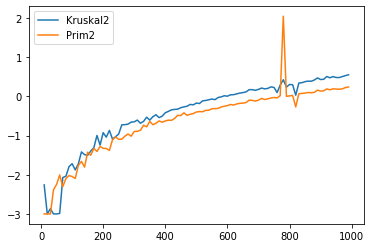

In [20]:
import matplotlib.pyplot as plt
import math

nTest=[ i*10 for i in range(1,100)]
tkruskal2=[]
tkruskal1=[]
tprim1=[]
tprim2=[]
o=[]

for i in nTest:
    print(i, end=" ")
    B=genGraphe2(i,i*500)
    
    t1=time.time()
    arbre1=Kruskal2(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tkruskal2.append(-3)
    else:
        tkruskal2.append(math.log(t2-t1,10))
    """    
    t1=time.time()
    arbre1=Kruskal(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tkruskal1.append(-3)
    else:
        tkruskal1.append(math.log(t2-t1,10))
    """     
    t1=time.time()
    arbre1=Prim2(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tprim2.append(-3)
    else:
        tprim2.append(math.log(t2-t1,10))
    """     
    t1=time.time()
    arbre1=Prim(B)
    t2=time.time()
    if (t2-t1)<0.001:
        tprim1.append(-3)
    else:
        tprim1.append(math.log(t2-t1,10))
    """   
    o.append(i)

#plt.plot(nTest,tkruskal1,label="Kruskal1")
plt.plot(nTest,tkruskal2,label="Kruskal2")
#plt.plot(nTest,tprim1,label="Prim1")
plt.plot(nTest,tprim2,label="Prim2")
plt.legend()

#plt.plot(nTest,o)
plt.show()

On observe alors que les 2 algorithmes donnent le même resultat. En revanche, on observe que l'algorithme de Kruskal est un peu plus long que l'algorithme de Prim en général. En effet, lorsque que nous créons notre graphe de manière aléatoire nous mettons une arête entre chaque sommet ce qui fait 100$\times$99=9900 arêtes. Par conséquent, vu que la complexité de Kruskal est de l'ordre de $nombre de Sommets \times nombred'Arêtes$ alors que celle de  Prim est de l'ordre de ${nombredeSommets}^2$, l'algorithme de Kruskal est plus long. Notre objectif est maintenant d'optimiser la complexité de ces derniers.

## Arbre couvrant de poids minimum : Modélisation PLNE

Nous allons maintenant modéliser le problème de l'arbre couvrant de poids minimum comme un programme linéaire en nombre entier. Pour cela nous utiliserons la librairie PuLP:

In [104]:
from pulp import*
import numpy as np
from itertools import combinations

**Définition du modèle :**

On considère comme précédemment un graphe non-orienté connexe $G=[S,A]$ dont chaque arête possède un poids $p_{a}$. On note désormais $n=|S|$ et $m=|A|$. Par la suite, chaque sommet sera numéroté de $0$ à $n-1$ et chaque arête sera numérotée de $0$ à $m-1$. On définit donc notre modèle :

*Variables :*
- $\forall a \in A, x_a\in \{0,1\}$ et $x_a=1$ si l'arrête $a$ est dans l'arbre couvrant de poids minimum.

*Objectif :*

- On cherche à minimiser la somme des poids des arêtes contenues dans l'arbre : 

$\min{\sum_{a\in A}{x_ap_a}}$ 

*Contraintes :*

Il faut que le graphe obtenu soit un arbre, on impose donc les 2 contraintes suivantes:

- Il faut qu'il y ait exactement $|S|-1$ arêtes soit $n-1$ arêtes:

$\begin{equation}
    {\sum_{a\in A}{x_a}=n-1}
    \end{equation}$

- Pour assurer la connexité et éviter la présence de cycles, chaque sous-ensemble $\bar{S}\subset S$ doit avoir au plus $|\bar{S}|-1$ arêtes : 

$\begin{equation}
    \sum_{a\in \bar{A}}{x_a} \le |\bar{S}|-1
    \end{equation}$, $\forall \bar{S}\subset S$ et $\bar{A}$ l'ensemble des arêtes dont les 2 sommets sont dans $\bar{S}$.


On crée donc d'abord une fonction chargée de construire le modèle. Elle prendra en argument la matrice d'incidence du graphe ainsi qu'un dictionnaire contenant les poids de chaque arête et dont la numérotation des arêtes correspond à celle de la matrice.

In [65]:
#A modifier en remplacer les matrices par des listes
def ModelePLNE (M,P):
    
    #Création du problème :
    prob = LpProblem("ACPM",LpMinimize)
    
    n = np.shape(M)[0] #Nombre de sommets
    m = np.shape(M)[1] #Nombre d'arêtes
    S = [i for i in range(n)] #Liste des sommets
    A = [i for i in range(m)] #Listes des arêtes
    
    #Variable :
    x={}
    for i in range(m):
        #On crée une variable de décision par arête
        x[i] = LpVariable("x"+"_"+str(i),0,1,LpInteger)

            
    #Objectif :
    prob += lpSum([x[i]*P[i] for i in A])

    #Contraintes :
    
        #Contrainte 1
    prob += lpSum([x[i] for i in A]) == n-1
    
        #Contrainte 2
    for k in range(3,n):
        L = list(combination(S,k))
        for ensemble in L:
            E = []
            for j in A:
                if(np.sum([M[i][j] for i in ensemble]) == 2):
                    E.append(j)
            prob += lpSum([x[a] for a in E])<=k-1
                
    #Retour du problème :
    return(prob)

**Remarque :**

Pour modéliser la seconde contrainte, nous avons considéré toutes les combinaisons de $k\in\{3,...,n-1\}$ sommets parmi $n$ sommets au total pour décrire les sous-ensembles $\bar{S}\subset S$. Le nombre de contraintes **NbCTR** pour un graphe donné en entrée de $n$ sommets sera donc :

$NbCTR = 1+\sum_{k=3}^{n-1}{C_n^k}=\sum_{k=0}^{n}{C_n^k}+1-C_n^0-C_n^1-C_n^2-C_n^n=2^n-n-\frac{n(n-1)}{2}-1$

On crée ensuite une fonction permettant de résoudre le problème et de l'afficher. Cette fonction n'affichera que les variables de décision égales à 1 à l'issu de la résolution du problème (c'est-à-dire les arêtes qui seront présentes dans l'arbre couvrant de poids minimum) :

In [12]:
def SolveAndPrint(Modele,name):
    Modele.writeLP(name)
    print(Modele)

    # Résolution du problème :
    print("Solve with CBC")
    Modele.solve(PULP_CBC_CMD())
    print("Status :",LpStatus[Modele.status])

    #Affichage de la solution :
    print("Poids minimum =",value(Modele.objective))
    print("Solution optimale :")
    for v in Modele.variables():
        if(v.varValue != 0):
            print(v.name,"=",v.varValue)

**Exemples et tests :**

Nous allons maintenant tester ces fonctions sur des exemples (dont l'exemple du cours) :

*Exemple n°1:*

![title](image1.png)

Ce graphe possède $5$ sommets, il y aura donc $16$ contraintes. 

In [13]:
#Création de la matrice d'incidence du graphe:

M1 = np.array([[1,1,0,0,0,0,0],
               [0,1,1,0,1,1,0],
               [0,0,0,0,0,1,1],
               [0,0,0,1,1,0,1],
               [1,0,1,1,0,0,0]])
    
#Création du dictionnaire des poids:

P1 = {0:4,1:5,2:6,3:2,4:4,5:2,6:3}

#Recherche de l'arbre couvrant de poids minimum (ACPM):

SolveAndPrint(ModelePLNE(M1,P1),"ACPM Exemple n°1")

ACPM:
MINIMIZE
4*x_0 + 5*x_1 + 6*x_2 + 2*x_3 + 4*x_4 + 2*x_5 + 3*x_6 + 0
SUBJECT TO
_C1: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 = 4

_C2: x_1 + x_5 <= 2

_C3: x_1 + x_4 <= 2

_C4: x_0 + x_1 + x_2 <= 2

_C5: x_6 <= 2

_C6: x_0 <= 2

_C7: x_0 + x_3 <= 2

_C8: x_4 + x_5 + x_6 <= 2

_C9: x_2 + x_5 <= 2

_C10: x_2 + x_3 + x_4 <= 2

_C11: x_3 + x_6 <= 2

_C12: x_1 + x_4 + x_5 + x_6 <= 3

_C13: x_0 + x_1 + x_2 + x_5 <= 3

_C14: x_0 + x_1 + x_2 + x_3 + x_4 <= 3

_C15: x_0 + x_3 + x_6 <= 3

_C16: x_2 + x_3 + x_4 + x_5 + x_6 <= 3

VARIABLES
0 <= x_0 <= 1 Integer
0 <= x_1 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer
0 <= x_5 <= 1 Integer
0 <= x_6 <= 1 Integer

Solve with CBC
Status : Optimal
Poids minimum = 11.0
Solution optimale :
x_0 = 1.0
x_3 = 1.0
x_5 = 1.0
x_6 = 1.0


Obtient ainsi l'arbre suivant. On retrouve bien le même résultat obtenu avec l'implémentation des algorithmes de Prim et de Kruskal :

![title](image2.png)

*Exemple n°2:*

On essaye maintenant notre programme sur un graphe possèdant cette fois-ci plus de sommets. Le graphe suivant possède $10$ sommets, il y aura donc $968$ contraintes dans notre programme.

![title](image3.png)

In [14]:
#Création de la matrice d'incidence:

M4 = np.zeros((10,21))
    
M4[0][0]=1; M4[0][20]=1; M4[0][16]=1
M4[1][0]=1; M4[1][1]=1; M4[1][2]=1; M4[1][4]=1
M4[2][20]=1; M4[2][1]=1; M4[2][3]=1; M4[2][3]=1; M4[2][14]=1; M4[2][15]=1
M4[3][3]=1; M4[3][2]=1; M4[3][5]=1; M4[3][6]=1
M4[4][4]=1; M4[4][5]=1; M4[4][7]=1; M4[4][9]=1; M4[4][8]=1
M4[5][8]=1; M4[5][11]=1; M4[5][10]=1
M4[6][13]=1; M4[6][9]=1; M4[6][11]=1; M4[6][12]=1
M4[7][10]=1; M4[7][12]=1; M4[7][18]=1; M4[7][19]=1
M4[8][17]=1; M4[8][14]=1; M4[8][6]=1; M4[8][7]=1; M4[8][13]=1; M4[8][18]=1
M4[9][16]=1; M4[9][15]=1; M4[9][17]=1; M4[9][19]=1
    
#Création du dictionnaire des poids:

P4={}
    
P4[0]=6; P4[1]=4; P4[2]=2; P4[3]=2; P4[4]=9
P4[5]=9; P4[6]=8; P4[7]=7; P4[8]=4; P4[9]=5
P4[10]=4; P4[11]=1; P4[12]=3; P4[13]=9; P4[14]=9
P4[15]=9; P4[16]=9; P4[17]=8; P4[18]=10; P4[19]=18
P4[20]=3

#Recherche de l'arbre couvrant de poids minimum (ACPM):

SolveAndPrint(ModelePLNE(M4,P4),"ACPM Exemple n°2")

ACPM:
MINIMIZE
6*x_0 + 4*x_1 + 4*x_10 + 1*x_11 + 3*x_12 + 9*x_13 + 9*x_14 + 9*x_15 + 9*x_16 + 8*x_17 + 10*x_18 + 18*x_19 + 2*x_2 + 3*x_20 + 2*x_3 + 9*x_4 + 9*x_5 + 8*x_6 + 7*x_7 + 4*x_8 + 5*x_9 + 0
SUBJECT TO
_C1: x_0 + x_1 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18
 + x_19 + x_2 + x_20 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 = 9

_C2: x_0 + x_1 + x_20 <= 2

_C3: x_0 + x_2 <= 2

_C4: x_0 + x_4 <= 2

_C5: x_0 <= 2

_C6: x_0 <= 2

_C7: x_0 <= 2

_C8: x_0 <= 2

_C9: x_0 + x_16 <= 2

_C10: x_20 + x_3 <= 2

_C11: x_20 <= 2

_C12: x_20 <= 2

_C13: x_20 <= 2

_C14: x_20 <= 2

_C15: x_14 + x_20 <= 2

_C16: x_15 + x_16 + x_20 <= 2

_C17: x_5 <= 2

_C18: __dummy <= 2

_C19: __dummy <= 2

_C20: __dummy <= 2

_C21: x_6 <= 2

_C22: x_16 <= 2

_C23: x_8 <= 2

_C24: x_9 <= 2

_C25: __dummy <= 2

_C26: x_7 <= 2

_C27: x_16 <= 2

_C28: x_11 <= 2

_C29: x_10 <= 2

_C30: __dummy <= 2

_C31: x_16 <= 2

_C32: x_12 <= 2

_C33: x_13 <= 2

_C34: x_16 <= 2

_C35: x_18 <= 2

_C36: x_16 + x

Status : Optimal
Poids minimum = 38.0
Solution optimale :
__dummy = None
x_11 = 1.0
x_12 = 1.0
x_17 = 1.0
x_2 = 1.0
x_20 = 1.0
x_3 = 1.0
x_6 = 1.0
x_7 = 1.0
x_8 = 1.0


 On obtient ainsi le résultat suivant. Le sous-graphe retenu est bien un arbre (c'est un graphe connexe et acyclique) et la somme des poids de toutes les arêtes est minimum :

![title](image4.png)

Deuxième modélisation utilisant les flots (Cette version sera utile pour traiter l'extension)
(...Détailler et expliquer le modèle...)

In [1]:
from pulp import*
from itertools import combinations
import re


def ModelePLNE_ACM(A):
    #Création du problème :
    prob = LpProblem("ACPM",LpMinimize)
    S = list(A.keys())
    n = len(S)
    VsansSource = S
    s = VsansSource.pop(0)
    #Variable :
    x={}
    for i in A.keys():
        x[i] = {}
        for j in A[i].keys():
            x[i][j] = LpVariable("x_"+str(i)+"_"+str(j),0,1,LpInteger)
            
    f={}
    for i in A.keys():
        f[i] = {}
        for j in A[i].keys():
            f[i][j] = {}
            for t in VsansSource:
                f[i][j][t] = LpVariable("f"+str(i)+str(j)+str(t),0,1,LpInteger)
                    
            
    #Objectif :
    prob += 1/2*lpSum([lpSum([x[i][j]*A[i][j] for j in A[i].keys()] for i in A.keys())])

    #Contraintes :

    for i in A.keys():
        for j in A[i].keys():
            prob += x[i][j] == x[j][i]
            
    for t in VsansSource:
        for a in S:
            if(a not in [s,t]):
                prob += lpSum([f[a][j][t] for j in A[a].keys()]) == lpSum([f[i][a][t] for i in A.keys() if a in list(A[i].keys())])
    
    for t in VsansSource:
        prob += lpSum([f[s][j][t] for j in A[s].keys()]) == 1
        prob += lpSum([f[i][s][t] for i in A.keys() if s in list(A[i].keys())]) == 0
    
    for t in VsansSource:
        prob += lpSum([f[i][t][t] for i in A.keys() if t in list(A[i].keys())]) == 1
        prob += lpSum([f[t][j][t] for j in A[t].keys()]) == 0
        
    prob += lpSum([lpSum([x[i][j] for j in A[i].keys()]) for i in A.keys()]) == 2*(n-1)
    
    for t in VsansSource:
        for i in A.keys():
            for j in A[i].keys():
                prob += f[i][j][t] <= x[i][j]
            
    #Retour du problème :
    return(prob)



Nouvelle fonction pour l'affichage

In [21]:
def AffichageModele(Modele,name):
    Modele.writeLP(name)
    #print(Modele)

    # Résolution du problème :
    print("Solve with CBC")
    Modele.solve(PULP_CBC_CMD())
    print("Status :",LpStatus[Modele.status])
    
    #Affichage de la solution :
    print("Optimal value =",value(Modele.objective))
    print("Optimal solution :")
    AretesTraites = []
    regexp = re.compile(r"_(\w+)_(\w+)")
    for v in Modele.variables():
        if(v.varValue != 0 and v.name[0] == 'x'):
            result = regexp.search(v.name)
            if result != None:
                i = result.group(1)
                j = result.group(2)
                if([j,i] not in AretesTraites):
                    AretesTraites.append([i,j])
            #print(v.name,"=",v.varValue)
    for arete in AretesTraites:
        print("On garde l'arête {",arete[0],",",arete[1],"}")
    print('Le poids de total de l\'arbre est de : ',value(Modele.objective))

Fonction permettant d'afficher le dictionnaire des arêtes du graphe (Un graphe étant entièrement défini par son double dictionnaire)

In [5]:
def AffichageGraphe(G):
    print('Le graphe contient les sommmets :',G.so)
    Arete_traite = []
    for i in G.ar:
        for j in G.ar[i]:
            if((j,i) not in Arete_traite):
                print('Le graphe contient l\'arête {',i,',',j,'} de poids',G.ar[i][j])
                Arete_traite.append((i,j))

**Test du second modèle**

* Sur l'un des exemples précédents (Exemple du cours)

In [15]:
G = Graphe()
G.ajouterArete('A','B',5)
G.ajouterArete('B','C',2)
G.ajouterArete('C','D',3)
G.ajouterArete('D','E',2)
G.ajouterArete('E','A',4)
G.ajouterArete('E','B',6)
G.ajouterArete('B','D',4)
AffichageGraphe(G)

Le graphe contient les sommmets : ['A', 'B', 'C', 'D', 'E']
Le graphe contient l'arête { A , B } de poids 5
Le graphe contient l'arête { A , E } de poids 4
Le graphe contient l'arête { B , C } de poids 2
Le graphe contient l'arête { B , E } de poids 6
Le graphe contient l'arête { B , D } de poids 4
Le graphe contient l'arête { C , D } de poids 3
Le graphe contient l'arête { D , E } de poids 2


In [22]:
#Résolution:
AffichageModele(ModelePLNE_ACM(G.ar),"ACPM exemple du cours")

Solve with CBC
Status : Optimal
Optimal value = 11.0
Optimal solution :
On garde l'arête { A , E }
On garde l'arête { B , C }
On garde l'arête { C , D }
On garde l'arête { D , E }
Le poids de total de l'arbre est de :  11.0


- Exemple aléatoire

In [66]:
G2 = genGraphe2()
AffichageGraphe(G2)

Le graphe contient les sommmets : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Le graphe contient l'arête { 1 , 2 } de poids 95
Le graphe contient l'arête { 1 , 10 } de poids 330
Le graphe contient l'arête { 1 , 6 } de poids 296
Le graphe contient l'arête { 1 , 4 } de poids 73
Le graphe contient l'arête { 1 , 3 } de poids 688
Le graphe contient l'arête { 1 , 7 } de poids 547
Le graphe contient l'arête { 1 , 5 } de poids 73
Le graphe contient l'arête { 1 , 9 } de poids 377
Le graphe contient l'arête { 1 , 8 } de poids 44
Le graphe contient l'arête { 2 , 3 } de poids 173
Le graphe contient l'arête { 2 , 10 } de poids 965
Le graphe contient l'arête { 2 , 9 } de poids 611
Le graphe contient l'arête { 2 , 6 } de poids 719
Le graphe contient l'arête { 2 , 5 } de poids 922
Le graphe contient l'arête { 2 , 4 } de poids 804
Le graphe contient l'arête { 2 , 8 } de poids 605
Le graphe contient l'arête { 2 , 7 } de poids 2
Le graphe contient l'arête { 3 , 4 } de poids 809
Le graphe contient

In [67]:
#Résolution:
AffichageModele(ModelePLNE_ACM(G2.ar),"ACPM exemple aléatoire")

SOLVING : 
Solve with CBC
Status : Optimal
Optimal value = 682.0
Optimal solution : 682.0
------------------------------
RESULTAT : ACPM exemple aléatoire
On garde l'arête { 10 , 5 }
On garde l'arête { 10 , 9 }
On garde l'arête { 1 , 2 }
On garde l'arête { 1 , 4 }
On garde l'arête { 1 , 8 }
On garde l'arête { 2 , 3 }
On garde l'arête { 2 , 7 }
On garde l'arête { 5 , 8 }
On garde l'arête { 6 , 8 }
L'arbre de Steiner contient les sommets :  []
Le poids de total de l'arbre est de :  682.0
------


## Pour aller plus loin : problème de l'abre de Steiner dans les graphes

Le problème de l'arbre de Steiner dans les graphes peut s'écrire de la manière suivante. Soit $G=(S,A)$ un graphe non-orienté connexe et $S'$$\subset$ $S$ un sous-ensemble de sommets appelés terminaux. Chaque arête $\{i,j\}$$\in$$A$ est munie d’un poids $p_{ij}$. On cherche un arbre $T=(S_{T},A_{T})$ couvrant tous les terminaux (Autrement dit on doit avoir $S'$$\subset$$S_{T}$) et de poids minimum.
Pour modéliser ce problème, on crée un graphe orienté $\bar{G}=(S,\bar{A})$ tel que $\forall \{u,v\}\in A$ on a $(u,v)\in \bar{A}$ et $(v,u)\in \bar{A}$ (Pour charque arête de $G$, on crée deux arcs de sens inverse dans $\bar{G}$).


**1) Modèle PLNE**

On utilisera à partir de maintenant les notations définies dans l'introduction précédente. Pour modéliser le problème de l'arbre de Steiner dans les graphes, nous allons utiliser des flots dans le graphe $\bar{G}$.

*Variable :*

- $\forall (i,j) \in \bar{A}$, $x_{ij}$ est une variable de décision binaire $(x_{ij} \in \{0,1\})$ et $x_{ij}=1$ si $\{i,j\}$ est dans $T$ (On a donc $x_{ij}=x_{ji}$). 
- On choisit arbitrairement une source parmi les terminaux que l’on note $s$. $\forall  t \in S'\backslash \{s\}$ et $\forall (i,j)\in \bar{A}$,  $f_{(i,j)}^t$ est une variable binaire $(f_{(i,j)}^t \in \{0,1\})$ donnant la valeur d’un flot $s-t$ compatible de valeur 1 passant sur l’arc $(i,j)$. $f_{(i,j)}^t=1$ s’il existe un flot  $s-t$ valant 1 passant par $(i,j)$.
- $\forall k \in S$, $v_k$ est une variable de décision binaire $(v_k \in {0,1})$ et $v_k=1$ si le sommet $k$ est dans $T$.

*Objectif :*

On cherche à minimiser le poids total de $T$ (ici on le divise par 2 car chaque arête est représentée par 2 arcs):

$$\min{\frac{1}{2}\sum_{(i,j)\in \bar{A}}{p_{ij}x_{ij}}}$$


*Contraintes :*

- Dans $\bar{G}$, si on choisit un arc dans un sens alors on prend aussi celui dans l'autre sens : $\forall i,j \in S, x_{ij} = x_{ji}$.
- Si on choisit un arc alors les sommets aux extrémités de cet arc seront dans $T$ : $\forall k \in S$, $   \forall (v,k) \in \delta^{-}(k)$, $x_{vk}\le{v_k}$ et $\forall (k,u) \in \delta^{+}(k)$, $x_{ku}\le v_k$.
- Pour tous les terminaux $t$ différents de $s$, le flot $s-t$ doit respecter la loi de conservation des flux :

$$\forall t \in S'\backslash \{s\}, \forall x \in S\backslash \{s,t\}, \sum_{(u,x)\in \delta^{-}(x)}{f_{(u,x)}^t} = \sum_{(x,v)\in \delta^{+}(x)}{f_{(x,v)}^t}$$

- Pour tous les terminaux $t$ différents de $s$, la flot $s-t$ doit être égale à 1 :

$$\forall t \in S'\backslash \{s\},  \sum_{(s,v)\in \delta^{+}(s)}{f_{(s,v)}^t} = 1$$

$$\forall t \in S'\backslash \{s\},  \sum_{(u,t)\in \delta^{-}(t)}{f_{(u,t)}^t} = 1$$

- Pour tous les terminaux $t$ différents de $s$, le flot $s-t$ entrant dans $s$ doit être nul :

$$\forall t \in S'\backslash \{s\},  \sum_{(u,s)\in \delta^{-}(s)}{f_{(u,s)}^t} = 0$$

- Pour tous les terminaux $t$ différents de $s$, la flot $s-t$ sortant de $t$ doit être nul :

$$\forall t \in S'\backslash \{s\},  \sum_{(t,v)\in \delta^{+}(t)}{f_{(t,v)}^t} = 0$$

- Si $T$ est connexe alors $T$ est un arbre si $|A_T| = |S_T|-1$ :

$$\sum_{(i,j) \in S}{x_{ij}} = 2 \times (\sum_{k\in S}{v_k}-1)$$

- Un flot ne peut valoir 1 sur une arête que si elle est choisie : $\forall t\in S'\backslash \{s\}, \forall (i,j)\in \bar{A}, f_{(i,j)}^t \le x_{i,j}$





On importe donc les modules nécessaires.

In [32]:
from pulp import*
from itertools import combinations
import re

Comme pour le problème de l'arbre couvrant de poids minimum, on crée une fonction chargée de construire le modèle. Elle prendra en argument un dictionnaire contenant les sommets reliés entre eux en index et les poids des arête en valeur. 

In [43]:
def ModelePLNE_Steiner(A,terminaux):
    #Création du problème :
    prob = LpProblem("ACPM",LpMinimize)
    S = list(A.keys())
    n = len(S)
    TerminauxSansSource = terminaux
    s = TerminauxSansSource.pop(0)
    #Variable :
    v={}
    for i in A.keys():
        v[i] = LpVariable("v_"+str(i),0,1,LpInteger)
    
    x={}
    for i in A.keys():
        x[i] = {}
        for j in A[i].keys():
            x[i][j] = LpVariable("x_"+str(i)+"_"+str(j),0,1,LpInteger)
            
    f={}
    for i in A.keys():
        f[i] = {}
        for j in A[i].keys():
            f[i][j] = {}
            for t in TerminauxSansSource:
                f[i][j][t] = LpVariable("f"+str(i)+str(j)+str(t),0,1,LpInteger)
                    
            
    #Objectif :
    prob += 1/2*lpSum([lpSum([x[i][j]*A[i][j] for j in A[i].keys()] for i in A.keys())])

    #Contraintes :

    for i in A.keys():
        for j in A[i].keys():
            prob += x[i][j] == x[j][i]
            
    for t in TerminauxSansSource:
        for a in S:
            if(a not in [s,t]):
                prob += lpSum([f[a][j][t] for j in A[a].keys()]) == lpSum([f[i][a][t] for i in A.keys() if a in list(A[i].keys())])
    
    for t in TerminauxSansSource:
        prob += lpSum([f[s][j][t] for j in A[s].keys()]) == 1
        prob += lpSum([f[i][s][t] for i in A.keys() if s in list(A[i].keys())]) == 0
    
    for t in TerminauxSansSource:
        prob += lpSum([f[i][t][t] for i in A.keys() if t in list(A[i].keys())]) == 1
        prob += lpSum([f[t][j][t] for j in A[t].keys()]) == 0
        
    prob += lpSum([lpSum([x[i][j] for j in A[i].keys()]) for i in A.keys()]) == 2*(lpSum([v[i] for i in A.keys()])-1)
    
    for t in TerminauxSansSource:
        for i in A.keys():
            for j in A[i].keys():
                prob += f[i][j][t] <= x[i][j]
    
    for i in A.keys():
        for j in A[i].keys():
            prob += x[i][j] <= v[i]
            prob += x[j][i] <= v[j]
            
    #Retour du problème :
    return(prob)

On construit ensuite une fonction permettant de résoudre et d'afficher le problème et sa solution :

In [46]:
def AffichageModele(Modele,name):
    Modele.writeLP(name)
    #print(Modele)

    # Résolution du problème :
    print("SOLVING : ")
    print("Solve with CBC")
    Modele.solve(PULP_CBC_CMD())
    print("Status :",LpStatus[Modele.status])
    print("Optimal value =",value(Modele.objective))
    print("Optimal solution :",value(Modele.objective))
    print("------------------------------")
    AretesTraites = []
    Sommets = []
    regexp = re.compile(r"_(\w+)_(\w+)")
    regexp2 = re.compile(r"v_(\d+)")
    for v in Modele.variables():
        if(v.varValue != 0 and (v.name[0] == 'x' or v.name[0] == 'v')):
            result = regexp.search(v.name)
            result2 = regexp2.search(v.name)
            if result != None:
                i = result.group(1)
                j = result.group(2)
                if([j,i] not in AretesTraites):
                    AretesTraites.append([i,j])
            if result2 != None:
                Sommets.append(int(result2.group(1)))
            #print(v.name,"=",v.varValue)
    #Affichage du résultat
    print("RESULTAT :",name)
    for arete in AretesTraites:
        print("On garde l'arête {",arete[0],",",arete[1],"}")
    print("L'arbre de Steiner contient les sommets : ",Sommets)
    print('Le poids de total de l\'arbre est de : ',value(Modele.objective),end="\n")
    print("------")

Test de la fonction précédente:

- Exemple simple (A partir de l'exemple du cours):

In [68]:
G3 = Graphe()
G3.ajouterArete('A','B',5)
G3.ajouterArete('B','C',2)
G3.ajouterArete('C','D',3)
G3.ajouterArete('D','E',2)
G3.ajouterArete('E','A',4)
G3.ajouterArete('E','B',6)
G3.ajouterArete('B','D',4)
Terminaux = ['A','E','C']
AffichageGraphe(G3)

Le graphe contient les sommmets : ['A', 'B', 'C', 'D', 'E']
Le graphe contient l'arête { A , B } de poids 5
Le graphe contient l'arête { A , E } de poids 4
Le graphe contient l'arête { B , C } de poids 2
Le graphe contient l'arête { B , E } de poids 6
Le graphe contient l'arête { B , D } de poids 4
Le graphe contient l'arête { C , D } de poids 3
Le graphe contient l'arête { D , E } de poids 2


In [71]:
#Résolution:
AffichageModele(ModelePLNE_Steiner(G3.ar,Terminaux),"Steiner Exemple 1")

SOLVING : 
Solve with CBC
Status : Optimal
Optimal value = 9.0
Optimal solution : 9.0
------------------------------
RESULTAT : Steiner Exemple 1
On garde l'arête { A , E }
On garde l'arête { C , D }
On garde l'arête { D , E }
L'arbre de Steiner contient les sommets :  []
Le poids de total de l'arbre est de :  9.0
------


- Exemple aléatoire

In [72]:
n = 10
G4 = genGraphe2(n,n*2,1,20)  
groupe = random.sample(G4.so,int(n/2)) 
AffichageGraphe(G4)

Le graphe contient les sommmets : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Le graphe contient l'arête { 1 , 2 } de poids 18
Le graphe contient l'arête { 1 , 10 } de poids 15
Le graphe contient l'arête { 1 , 4 } de poids 1
Le graphe contient l'arête { 1 , 8 } de poids 9
Le graphe contient l'arête { 1 , 5 } de poids 15
Le graphe contient l'arête { 2 , 3 } de poids 18
Le graphe contient l'arête { 2 , 5 } de poids 18
Le graphe contient l'arête { 3 , 4 } de poids 10
Le graphe contient l'arête { 3 , 9 } de poids 1
Le graphe contient l'arête { 3 , 7 } de poids 11
Le graphe contient l'arête { 4 , 5 } de poids 15
Le graphe contient l'arête { 4 , 7 } de poids 16
Le graphe contient l'arête { 4 , 8 } de poids 10
Le graphe contient l'arête { 4 , 10 } de poids 5
Le graphe contient l'arête { 5 , 6 } de poids 18
Le graphe contient l'arête { 6 , 7 } de poids 13
Le graphe contient l'arête { 6 , 10 } de poids 15
Le graphe contient l'arête { 7 , 8 } de poids 12
Le graphe contient l'arête { 8 , 

In [73]:
#Résolution:
AffichageModele(ModelePLNE_Steiner(G4.ar,groupe),"Steiner Exemple aléatoire")

SOLVING : 
Solve with CBC
Status : Optimal
Optimal value = 40.0
Optimal solution : 40.0
------------------------------
RESULTAT : Steiner Exemple aléatoire
On garde l'arête { 1 , 4 }
On garde l'arête { 2 , 3 }
On garde l'arête { 3 , 4 }
On garde l'arête { 3 , 7 }
L'arbre de Steiner contient les sommets :  [1, 2, 3, 4, 7]
Le poids de total de l'arbre est de :  40.0
------


**2) Implémentation d'une méthode Heuristique**

Nous allons maintenant implémenter la méthode de Takahashi et Matsuyama... (à détailler)

In [58]:
import math as m

Pour cela, nous allons d'abord devoir implémenter l'algorithme de Disjkstra

In [59]:
def Dijkstra(G, source):
    #Initialisation:
    L = {}
    predecesseur = {}
    for i in G.so:
        if(i != source):
            L[i] = m.inf
    L[source] = 0
    M = []
    #Boucle:
    while len(M) != len(G.so):
        minimum = m.inf
        s = None
        for i in L:
            if(L[i]<minimum and i not in M):
                minimum = L[i]
                s = i    
        M.append(s)
        for t in G.ar[s]:
            if(t not in M):
                if(L[s]+G.ar[s][t]<L[t]):
                    L[t] = G.ar[s][t] + L[s]
                    predecesseur[t] = s
    return(L,predecesseur)

On implémente également une fonction chemin qui nous permettra de retrouver un chemin (chaine) dans un graphe à partir d'un tableau de prédécesseurs.

In [54]:
def Chemin(depart,arrive,Predecesseur):
    Chemin = []
    s = arrive
    while s != depart:
        Chemin.append(s)
        s = Predecesseur[s]
    Chemin.append(s)
    Chemin.reverse()
    return(Chemin)


On construit maintenant notre algorithme heuristique. 

In [55]:
def SteinerTree(G,groupe):
    T = Graphe()
    Poid_total = 0
    noeud = groupe.pop(0)
    T.ajouterSommet(noeud)
    while len(groupe)>0:
        Distance_min = m.inf
        noeud = None
        C = None
        for v in groupe:
            Longueur, Predecesseurs = Dijkstra(G,v)
            for s in T.so:
                if(Longueur[s]<Distance_min):
                    Distance_min = Longueur[s]
                    noeud = v
                    C = Chemin(v,s,Predecesseurs)
        groupe.remove(noeud)
        for i in range(len(C)-1):
            T.ajouterArete(C[i],C[i+1],G.ar[C[i]][C[i+1]])
            Poid_total += G.ar[C[i]][C[i+1]]
    return(T,Poid_total)
        

Enfin, on test cet algorithme en comparant son résultat avec le modèle PLNE.

In [74]:
T1 = time.time()
G5 = genGraphe2(10,20,1,20)  
AffichageGraphe(G5)
gr1 = random.sample(G5.so,8)
print('Terminaux :',gr1)
gr2 = gr1.copy()
print("---------PLNE------------")
t1 = time.time()
AffichageModele(ModelePLNE_Steiner(G5.ar,gr1),"Steiner Test 1")
t2 = time.time()
print("Temps d'éxecution pour l'Heuristique :",t2-t1,"secondes")
print("---------HEURISTIQUE------------")
t1 = time.time()
T,P = SteinerTree(G5,gr2)
t2 = time.time()
print("Temps d'éxecution pour l'Heuristique :",t2-t1,"secondes")
AffichageGraphe(T)
print('Le poids total de l\'arbre est de :',P)
T2 = time.time()
print("Temps total d'execution :",T2-T1,"secondes")

Le graphe contient les sommmets : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Le graphe contient l'arête { 1 , 2 } de poids 5
Le graphe contient l'arête { 1 , 10 } de poids 6
Le graphe contient l'arête { 1 , 3 } de poids 7
Le graphe contient l'arête { 2 , 3 } de poids 2
Le graphe contient l'arête { 2 , 4 } de poids 18
Le graphe contient l'arête { 2 , 5 } de poids 17
Le graphe contient l'arête { 2 , 10 } de poids 9
Le graphe contient l'arête { 2 , 9 } de poids 1
Le graphe contient l'arête { 3 , 4 } de poids 17
Le graphe contient l'arête { 3 , 8 } de poids 4
Le graphe contient l'arête { 4 , 5 } de poids 4
Le graphe contient l'arête { 4 , 8 } de poids 8
Le graphe contient l'arête { 5 , 6 } de poids 18
Le graphe contient l'arête { 5 , 10 } de poids 18
Le graphe contient l'arête { 6 , 7 } de poids 20
Le graphe contient l'arête { 6 , 8 } de poids 6
Le graphe contient l'arête { 6 , 9 } de poids 9
Le graphe contient l'arête { 7 , 8 } de poids 9
Le graphe contient l'arête { 8 , 9 } de p

**3) Analyse (A compléter en ajoutant l'étude de compléxité)**

Nous avons remarqué que dans certains cas la méthode heuristique renvoyait un résultat légèrement supérieur au résultat exacte (En revanche le poids minimal renvoyé par la méthode heuristique est toujours supérieur ou égale à celui renvoyé par le modèle PLNE). Nous allons donc essayer de mesurer empiriquement le pourcentage d'erreur de la méthode heuristique. Pour faciliter la résolution du modèle PLNE, on crée la fonction suivant qui ne fait que résoudre et afficher l'objectif (sans afficher tout le modèle).

In [62]:
def Solve(Modele):
    Modele.solve(PULP_CBC_CMD())
    return(value(Modele.objective))

On effectue ensuite 100 test. Pour chaque test, on compare le résultat obtenue (c'est-à-dire le poid minimal obtenu) par l'heuristique avec la solution du PLNE et on compte le nombre de fois où il y a eu une différence.

In [79]:
#Attention: Le temps d'exécution de cette cellule est assez long (10 secondes environ)
difference = 0
NbTest = 100
T1 = time.time()
for test in range(NbTest):
    print("Test n°:",test)
    G = genGraphe2(10,20,1,20)  
    gr1 = random.sample(G.so,3) 
    gr2 = gr1.copy()
    P1 = Solve(ModelePLNE_Steiner(G.ar,gr1))
    print("Poids PLNE:",P1)
    T,P2 = SteinerTree(G,gr2)
    print("Poids Heuristique:",P2)
    if P1!=P2: difference+=1
T2 = time.time()
print("Temps total d'execution :",T2-T1,"secondes")
print("Nombre de différences sur",NbTest,"tests",":",difference)
print("L'heuriste renvoie le même résultat que le modèle PLNE dans",100-difference,"% des cas (Fréquence empirique)")

Test n°: 0
Poids PLNE: 21.0
Poids Heuristique: 21
Test n°: 1
Poids PLNE: 24.0
Poids Heuristique: 24
Test n°: 2
Poids PLNE: 13.0
Poids Heuristique: 13
Test n°: 3
Poids PLNE: 17.0
Poids Heuristique: 17
Test n°: 4
Poids PLNE: 27.0
Poids Heuristique: 27
Test n°: 5
Poids PLNE: 10.0
Poids Heuristique: 10
Test n°: 6
Poids PLNE: 18.0
Poids Heuristique: 18
Test n°: 7
Poids PLNE: 12.0
Poids Heuristique: 12
Test n°: 8
Poids PLNE: 25.0
Poids Heuristique: 25
Test n°: 9
Poids PLNE: 24.0
Poids Heuristique: 24
Test n°: 10
Poids PLNE: 21.0
Poids Heuristique: 21
Test n°: 11
Poids PLNE: 15.0
Poids Heuristique: 15
Test n°: 12
Poids PLNE: 26.0
Poids Heuristique: 29
Test n°: 13
Poids PLNE: 32.0
Poids Heuristique: 32
Test n°: 14
Poids PLNE: 12.0
Poids Heuristique: 12
Test n°: 15
Poids PLNE: 27.0
Poids Heuristique: 27
Test n°: 16
Poids PLNE: 13.0
Poids Heuristique: 13
Test n°: 17
Poids PLNE: 21.0
Poids Heuristique: 21
Test n°: 18
Poids PLNE: 17.0
Poids Heuristique: 17
Test n°: 19
Poids PLNE: 19.0
Poids Heuris

## Conclusion et prochains objectifs (A modifier):

Nous disposons maintenant d'une première version fonctionnelle de l'algorithme de Prim, de l'algorithme de Kruskal ainsi que du modèle PLNE. L'un de nos prochains objectifs sera de mettre en évidence la complexité asymptotique de chacun de ces algorithmes. Il faudra aussi implémenter une autre version améliorée de chacun de ces algorithmes avec une compléxité optimale. L'algorithme de Kruskal que nous avons programmé a une compléxité en $O(m\times n)$. Elle peut être améliorée en optimisant la détection de cycle à chaque itération. Pour cela, on peut utiliser des "listes de sommets accessibles". De même, la version de l'algorithme de Prim que nous avons codée possède une complexité en $O(n^2)$. Il est possible d'atteindre une complexité en $O(m\log(n))$ en utilisant une structure de tas-min binaire. Il sera aussi intéressant de mettre en évidence ces améliorations. Enfin, nous traiterons l'extension possible du sujet concernant les arbres de Steiner.